<a href="https://colab.research.google.com/github/ameyas1/Image_Resolution/blob/master/Image_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow_datasets as tfds

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline

In [0]:
import os

In [0]:
from IPython.display import clear_output

In [6]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
print(tf.__version__)

2.2.0


In [7]:
# Load dataset 
ds,info = tfds.load('stanford_dogs', split='train', shuffle_files=True, as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete18MZHL/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete18MZHL/stanford_dogs-test.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


tf.Tensor(
[[[235 225 223]
  [236 226 224]
  [237 227 225]
  ...
  [240 230 228]
  [223 214 209]
  [223 209 206]]

 [[231 221 219]
  [233 223 221]
  [236 226 224]
  ...
  [226 216 214]
  [214 204 202]
  [219 208 204]]

 [[229 220 215]
  [231 222 217]
  [233 224 219]
  ...
  [221 211 209]
  [219 209 207]
  [232 221 217]]

 ...

 [[238 227 223]
  [246 235 231]
  [240 229 225]
  ...
  [241 233 231]
  [244 236 234]
  [231 225 227]]

 [[244 233 229]
  [247 236 232]
  [240 229 225]
  ...
  [243 235 233]
  [245 237 235]
  [234 228 230]]

 [[243 232 228]
  [242 231 227]
  [237 226 222]
  ...
  [244 236 234]
  [246 238 236]
  [239 233 235]]], shape=(500, 481, 3), dtype=uint8)
(500, 481, 3)


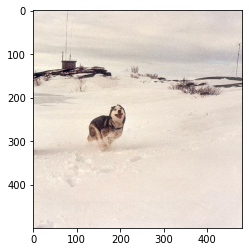

In [8]:
for x,y in ds.take(1):
  print(x)
  print(x.shape)
  plt.imshow(x)

In [9]:
info

tfds.core.DatasetInfo(
    name='stanford_dogs',
    version=0.2.0,
    description='The Stanford Dogs dataset contains images of 120 breeds of dogs from around
the world. This dataset has been built using images and annotation from
ImageNet for the task of fine-grained image categorization. There are
20,580 images, out of which 12,000 are used for training and 8580 for
testing. Class labels and bounding box annotations are provided
for all the 12,000 images.
',
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
        }),
    }),
    total_num_examples=20580,
    splits={
        'test': 8580,
        'train': 12000,
    },
    supervised_keys=('image

In [10]:
info.splits['test'].num_examples

8580

In [0]:
num_examples = info.splits['train'].num_examples 
#+info.splits['test'].num_examples
# num_examples = info.splits['test'].num_examples

# num_elements = 0
# for element in dataset:
#     num_elements += 1

In [12]:
num_examples

12000

In [0]:
def preprocess(x,y):
  out = tf.image.convert_image_dtype(x, tf.float32)
  out = tf.image.resize(out, [256, 256])
  out = tf.image.random_flip_left_right(out)
  out = tf.image.random_flip_up_down(out)
  # x1 = tf.image.random_jpeg_quality(x, 0, 10)
  inp = tf.image.resize(out, [64, 64])
  inp = tf.image.resize(inp, [256, 256])

  return inp,out

In [0]:

ds = ds.cache().shuffle(num_examples//200)
ds = ds.map(preprocess,num_parallel_calls=tf.data.experimental.AUTOTUNE)

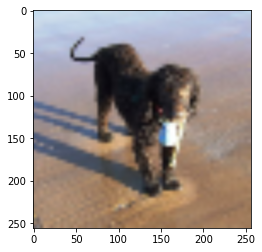

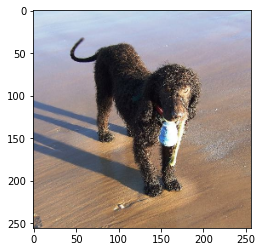

tf.Tensor(
[[[0.7759154  0.8661114  0.9366996 ]
  [0.7759154  0.8661114  0.9366996 ]
  [0.77622986 0.8654455  0.93554354]
  ...
  [0.7429518  0.8374448  0.91798383]
  [0.74518293 0.839059   0.91999376]
  [0.74518293 0.839059   0.91999376]]

 [[0.7759154  0.8661114  0.9366996 ]
  [0.7759154  0.8661114  0.9366996 ]
  [0.77622986 0.8654455  0.93554354]
  ...
  [0.7429518  0.8374448  0.91798383]
  [0.74518293 0.839059   0.91999376]
  [0.74518293 0.839059   0.91999376]]

 [[0.7755652  0.8657612  0.93634945]
  [0.7755652  0.8657612  0.93634945]
  [0.7759675  0.8651831  0.93528116]
  ...
  [0.74120295 0.8315389  0.91327584]
  [0.7430743  0.83281386 0.91493684]
  [0.7430743  0.83281386 0.91493684]]

 ...

 [[0.44039646 0.39185828 0.38113272]
  [0.44039646 0.39185828 0.38113272]
  [0.45108896 0.40468132 0.3938045 ]
  ...
  [0.6196281  0.4733045  0.34687018]
  [0.61937726 0.47305375 0.34584785]
  [0.61937726 0.47305375 0.34584785]]

 [[0.41737992 0.37514296 0.3734849 ]
  [0.41737992 0.37514296 0

In [15]:
for x,y in ds.take(1):
  plt.imshow(x)
  plt.show()
  plt.imshow(y)
  plt.show()
  print(x)
  print(y)


In [0]:
BATCH_SIZE=10
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [17]:
for x,y in ds.take(1):
  print(x.shape,y.shape)

(10, 256, 256, 3) (10, 256, 256, 3)


In [0]:
inp = Input(shape=(256,256,3))

l1 = Conv2D(64, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(inp)

l2 = Conv2D(64, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l1)

l3 = MaxPooling2D()(l2)

l4 = Conv2D(128, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l3)

l5 = Conv2D(128, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l4)

l6 = MaxPooling2D()(l5)

l7 = Conv2D(256, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l6)

l8 = Conv2D(256, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l7)

l9  = MaxPooling2D()(l8)

l10 = Conv2D(512, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l9)

l11 = Conv2D(512, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l10)

l12  = MaxPooling2D()(l11)

l13 = Conv2D(1024, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10), name='encoder_output')(l12)           

In [0]:
encoder = Model(inputs=inp, outputs=l13)

In [41]:
encoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 128)       0   

In [0]:
inp = Input(shape=(256,256,3))

l1 = Conv2D(64, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(inp)

l2 = Conv2D(64, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l1)

l3 = MaxPooling2D()(l2)

l4 = Conv2D(128, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l3)

l5 = Conv2D(128, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l4)

l6 = MaxPooling2D()(l5)

l7 = Conv2D(256, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l6)

l8 = Conv2D(256, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l7)

l9  = MaxPooling2D()(l8)

l10 = Conv2D(512, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l9)

l11 = Conv2D(512, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l10)

l12  = MaxPooling2D()(l11)

l13 = Conv2D(1024, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10), name='encoder_output')(l12)

In [0]:
l14 = UpSampling2D()(l13)

l15 = Conv2D(512, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l14)

l16 = Conv2D(512, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l15)

l17 = add([l16,l11])

l18 = UpSampling2D()(l17)

l19 = Conv2D(256, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l18)

l20 = Conv2D(256, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l19)

l21 = add([l20,l8])

l22 = UpSampling2D()(l21)

l23 = Conv2D(128, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l22)

l24 = Conv2D(128, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l23)

l25 = add([l24,l5])

l26 = UpSampling2D()(l25)

l27 = Conv2D(64, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l26)

l28 = Conv2D(64, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l27)

l29 = add([l28,l2])

l30 = Conv2D(3, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l29)

l31 = add([l30,inp])

decoded = Conv2D(3, (3,3), padding='same', activation='relu', 
            activity_regularizer=regularizers.l1(10e-10))(l31)

autoencoder = Model(inp, decoded)

In [23]:
autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 256, 256, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_9[0][0]                   
____________________________________________________________________________________________

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

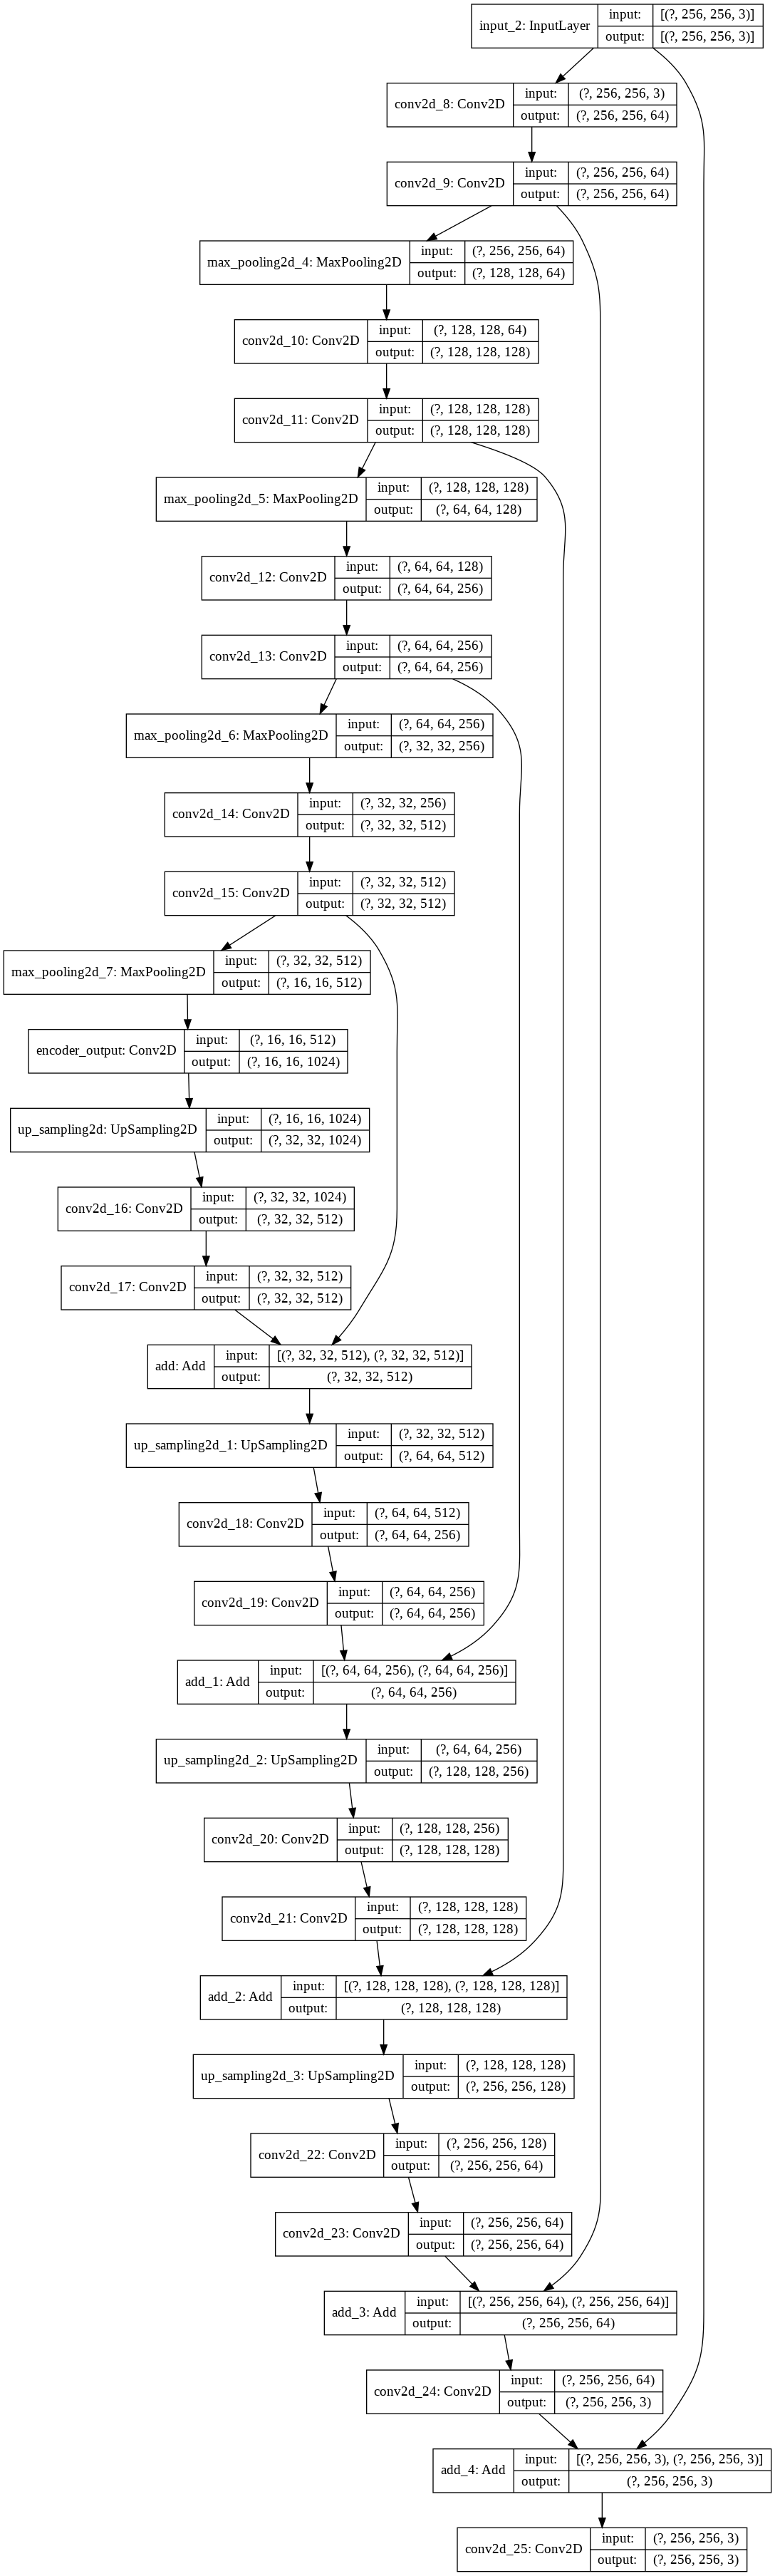

In [25]:
tf.keras.utils.plot_model(
    autoencoder, to_file='autoencoder.png', show_shapes=True, show_layer_names=True)

In [0]:
def prediction(h_img, l_img,ind):
  encoded_imgs = encoder.predict(l_img)
  sr=np.clip(autoencoder.predict(l_img),0.,1.)
  # sr = autoencoder.predict(l_img)

  plt.figure(figsize=(256,256))
  i=1
  ax=plt.subplot(10,10,i)
  plt.imshow(l_img[ind])
  i+=1
  ax=plt.subplot(10,10,i)
  plt.imshow(l_img[ind], interpolation='bicubic')
  i+=1
  ax=plt.subplot(10,10,i)
  plt.imshow(encoded_imgs[ind].reshape((16*16,1024)))
  i+=1
  ax=plt.subplot(10,10,i)
  plt.imshow(sr[ind])
  i+=1
  ax=plt.subplot(10,10,i)
  plt.imshow(h_img[ind])

  plt.show()

In [0]:
for x,y in ds.take(1):
  sample_x=x
  sample_y=y

In [0]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for x,y in dataset.take(1):
      prediction(y,x, 3)
  else:
    prediction(sample_y,sample_x, 3)



In [0]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    autoencoder.save_weights('/content/cp/autoencoder_new.hdf5')
    encoder = tf.keras.models.Model(autoencoder.input, autoencoder.get_layer('encoder_output').output)
    encoder.save_weights('/content/cp/encoder_new.hdf5')
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [30]:
for layer in autoencoder.layers:
    print(layer.name)

input_2
conv2d_8
conv2d_9
max_pooling2d_4
conv2d_10
conv2d_11
max_pooling2d_5
conv2d_12
conv2d_13
max_pooling2d_6
conv2d_14
conv2d_15
max_pooling2d_7
encoder_output
up_sampling2d
conv2d_16
conv2d_17
add
up_sampling2d_1
conv2d_18
conv2d_19
add_1
up_sampling2d_2
conv2d_20
conv2d_21
add_2
up_sampling2d_3
conv2d_22
conv2d_23
add_3
conv2d_24
add_4
conv2d_25


In [0]:
!mkdir cp

In [0]:
!mv '/content/drive/My Drive/Screencastify/autoencoder_new.hdf5' /content/cp
!mv '/content/drive/My Drive/Screencastify/encoder_new.hdf5' /content/cp

In [33]:
if len(os.listdir('cp'))==2:
  autoencoder.load_weights('/content/cp/autoencoder_new.hdf5')
  encoder.load_weights('/content/cp/encoder_new.hdf5')
  print('model found')
else:
  print('model not found')


model found


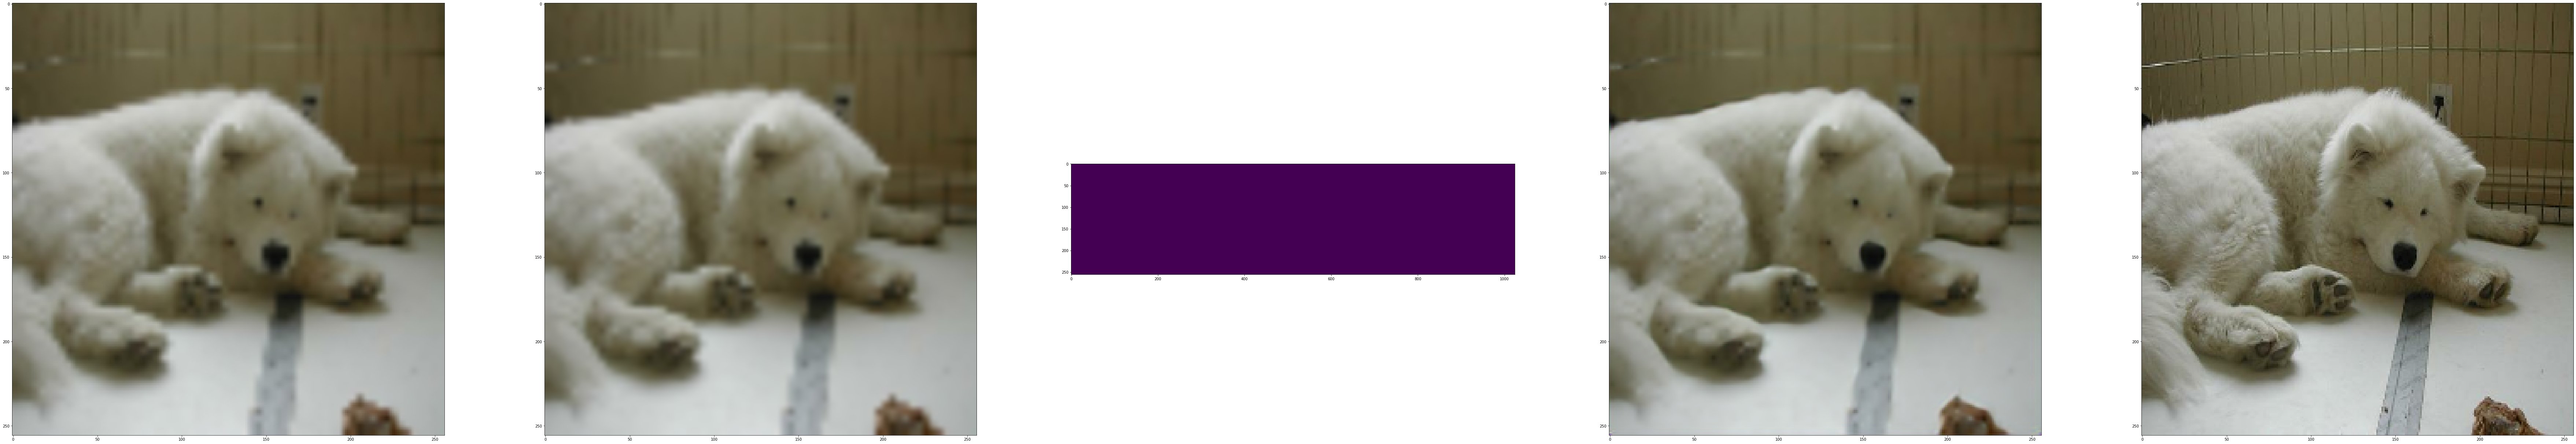

In [34]:
show_predictions()

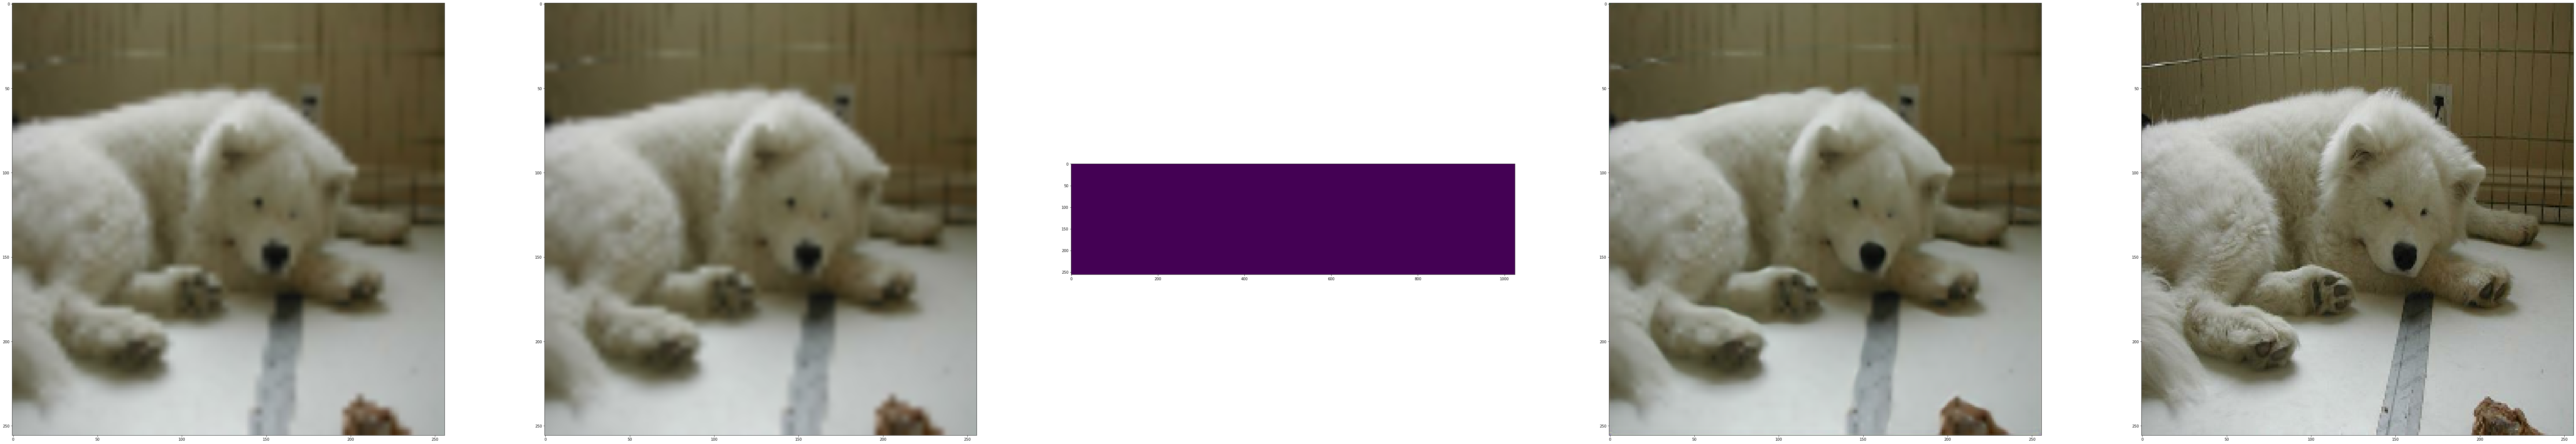


Sample Prediction after epoch 5

1200/1200 [==============================] - 1309s 1s/step - loss: 0.0039


In [35]:
history = autoencoder.fit(ds , epochs=5, callbacks=[DisplayCallback()])

In [0]:
autoencoder.load_weights('/content/cp/autoencoder_new.hdf5')
encoder.load_weights('/content/cp/encoder_new.hdf5')

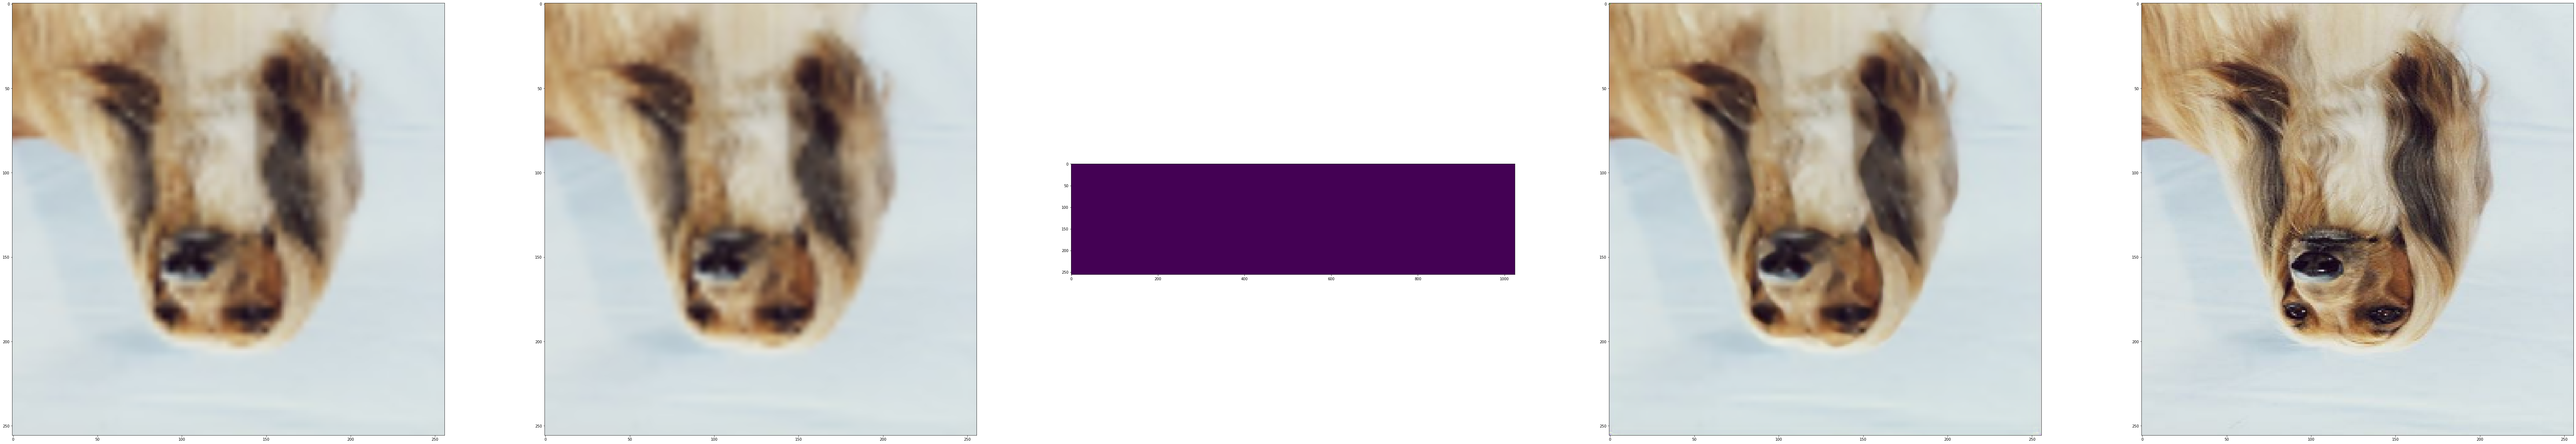

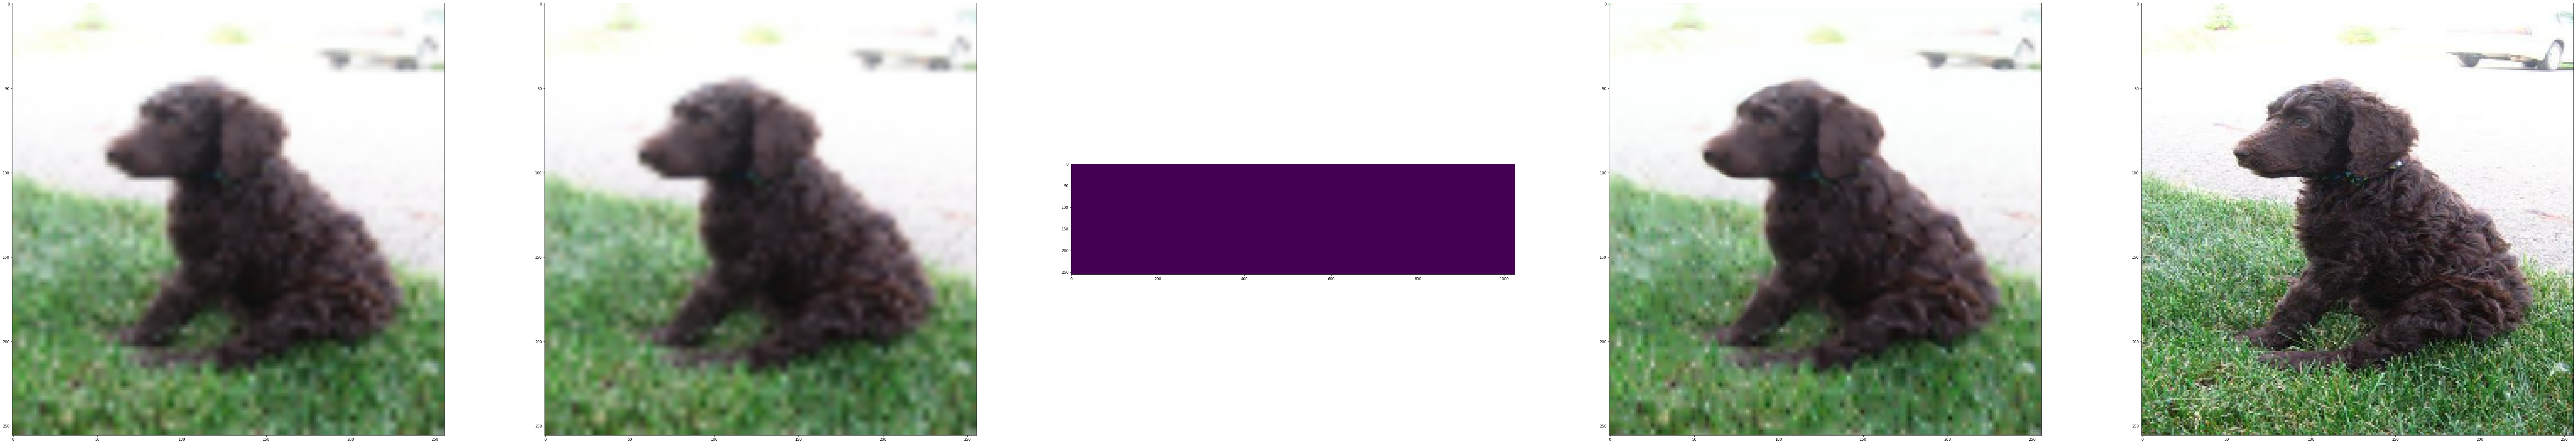

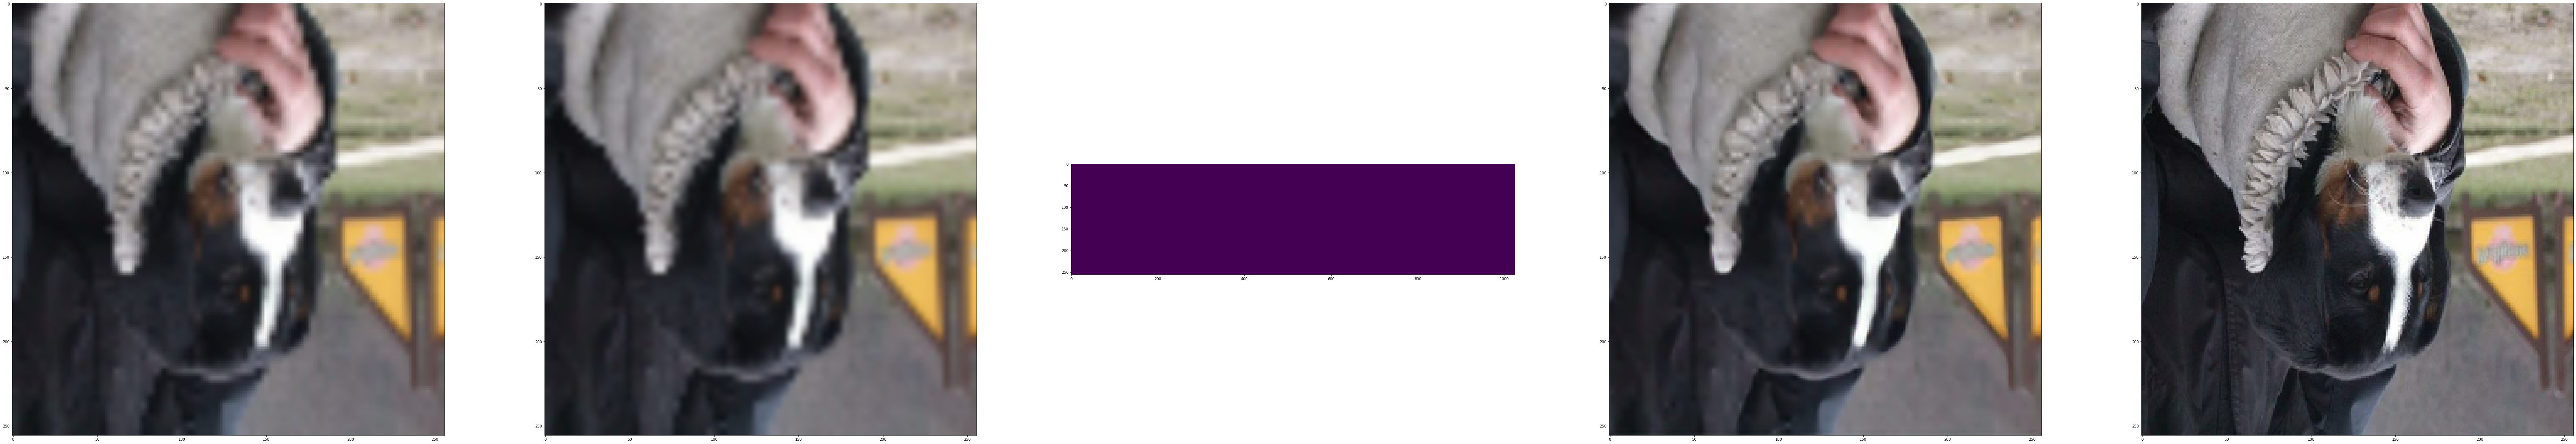

In [37]:
for x,y in ds.take(3):
  prediction(y,x, np.random.randint(0, BATCH_SIZE-1))

In [0]:
!mv /content/cp/autoencoder_new.hdf5 '/content/drive/My Drive/Screencastify'
!mv /content/cp/encoder_new.hdf5 '/content/drive/My Drive/Screencastify'